In [182]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from scipy.io import loadmat
from scipy.special import legendre
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
from tqdm import tqdm
from IPython.display import display, Math, Latex, HTML
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
data_path = "gdrive/My Drive/Colab Notebooks/mlmath_data/hw06p6_data.mat"

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

# 1.

This week was the closing of the Linear Algebra portion of the course, which was focused on the Numeric Methods for solving Least Squares.  The Steepest Descent Algorithm and Conjugate Gradients is motivted by the increasing difficulty to effeciently solve larger and larger sets of data.  By solving a quadratic system $\boldsymbol{A}^T\boldsymbol{A}\boldsymbol{x} = \boldsymbol{H}\boldsymbol{x} = \boldsymbol{A}\boldsymbol{y} = \boldsymbol{b} $  the resulting optimization program $\underset{x \in \mathbb{R}^N}{\text{minimize}} \frac{1}{2} \boldsymbol{x}^T\boldsymbol{H}\boldsymbol{x} - \boldsymbol{x}^T\boldsymbol{b}$ is convex and can be solved by iterative procudure that involves picking a direction and magnitude given a position.  Of the two methods reviewed, Conjugate Gradients is the most interesting.  By intelligently choosing directions by maintaining orthogonality to the previous directions it is able to find a solution in a number of steps the same as the dimensionality of the data.  The relation to Gram-Schmidt was surprising and is worth further study.  A particular aspect of these methods that can affect performance is their sensitivity to the condition number of $\boldsymbol{H}$.  This class of techniques is widely applied across many fields.  It is the go-to method when inversion is not feasible.


# 2.

In [292]:
a1 = np.array([1, 1, -1, -1, -1])
a2 = np.array([1, 1, 1, 1, 1,])
a3 = np.array([1, -1, 1, -1, 1])

A = np.stack([a1, a2, a3], axis=1).astype(float)
q = np.zeros_like(A)
r = np.zeros((A.shape[1], A.shape[1]))
for k, a in enumerate(A.T):
    r[:,k] = a.T@q 
    w = a.T - q@r[:,k]
    r[k,k] = np.sqrt(w.T@w)
    q[:,k] = np.squeeze(w / r[k,k])
        
u,s,vt = np.linalg.svd(q, full_matrices=False)
javascript(url=url)
if np.allclose(A, q@r):
    display(Math(r"A = {}".format(bmatrix(A))))
    display(Math(r"(a)\; \boldsymbol{} = {}".format("{Q}",bmatrix(q))))
    display(Math(r"(b)\; \boldsymbol{} = {}".format("{R}", bmatrix(r))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (c)



---
<pre>


















</pre>



## (d)



---
<pre>


















</pre>



## (e)



---
<pre>


















</pre>



# 3.

$$f(x) = \boldsymbol{x}^T\boldsymbol{H}\boldsymbol{x}$$


---
<pre>


















</pre>









# 4.

## (a)


In [134]:
H = np.array([[2, 1], [1, 2]])
b = np.array([[-1], [-3]])

f = lambda x: 0.5*x.T@H@x-b.T@x
ei, v = np.linalg.eig(H)
x_star = np.linalg.inv(H)@b
javascript(url=url)
display(Math(r"x_\star = {}".format(bmatrix(x_star))))

<IPython.core.display.Math object>

## (b)
---
<pre>


















</pre>

\begin{align}
f(\mathbf{x}) = \_\_x_1^2 + \_\_x_2^2 + \_\_x_1x_2 + \_\_x_1 + \_\_x_2
\end{align}

## (c)

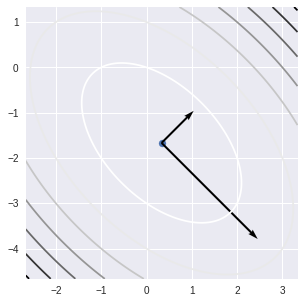

In [112]:
l = 3
x_ = np.linspace(-l,l,300)
ux, uy = np.meshgrid(x_+x_star[0],x_+x_star[1])
x = np.stack((ux.reshape(-1), uy.reshape(-1)), 1)
y = np.array(list(map(f,x))).reshape(300,300)
fig, ax = plt.subplots(1, figsize=(5,5))
ax.contour(ux, uy, y)
ax.scatter(*x_star)
vs = ei*v.T
ax.quiver(*x_star, vs[0,:], vs[1,:], scale=1, scale_units='xy', units='xy')
ax.set_aspect('equal')


The eigenvalues and eigenvectors of $\boldsymbol{H}$ are stretching the 2-D quadratic along the eigenvectors at a scale with the eigenvalues.

## (d)

Text(0.5,0.98,'Gradient Descent v1')

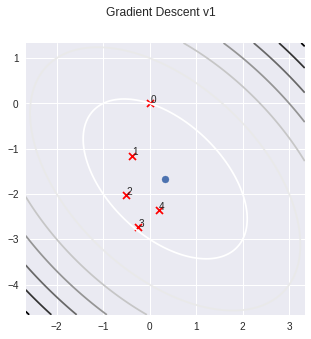

In [180]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.contour(ux, uy, y)
ax.scatter(*x_star)
x = np.array([[0.],[0.]])
ax.scatter(*x, marker='x', c='red')
ax.annotate(str(0), xy=(x[0][0]+0.01, x[1][0]+0.01))
r = b-H@x
# SGD v1
delta = .01
for n in range(1,5):
    a = r.T@r/(r.T@H@r)
    x += a*r
    r = b - a*H@x
    ax.scatter(*x, marker='x', c='red')
    ax.annotate(str(n), xy=(x[0][0]+0.01, x[1][0]+0.01))
fig.suptitle('Gradient Descent v1')
    


# 5.


---
<pre>


















</pre>

# 6.

Steepest Descent solved in 263 steps with tol of 9.47E-07 and error of 2.90E-05
Conjugate Gradient solved in 57 steps with tol of 8.87E-07 and error of 2.71E-05


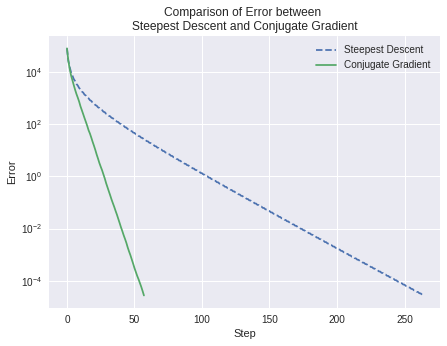

In [284]:
data = loadmat(data_path)
H, b = data['H'], data['b']

class sdsolve:
    def __init__(self, H, b, tol, maxiter, solver='Conjugate Gradient'):
        self.H = H
        self.N = b.shape[0]
        self.b = b
        self.tol = tol
        self.maxiter = maxiter
        self.x_hist = []
        self.solver = solver
        
    def solve(self, x):
        x = x.copy()
        if self.solver == 'Conjugate Gradient':
            x_h, k = self._conjugate_gradient(x)
        elif self.solver == 'Steepest Descent':
            x_h, k = self._sgd_v2(x)
        
        print("{} solved in {} steps with tol of {:.2E} and error of {:.2E}".format(self.solver, k, *self.x_hist[-1][1:]))
        return x_h, k
        
    def _sgd_v2(self, x):
        r = self.b - self.H@x
        for k in range(self.maxiter):
            q = self.H@r
            error = np.linalg.norm(r)/np.linalg.norm(b)
            a = r.T@r/(r.T@q)
            self.x_hist.append((x, error, np.linalg.norm(self.H@x-self.b)))
            x += a*r
            r -= a*q
            if  error < self.tol:
                break
        return x, k
    
    def _conjugate_gradient(self, x):
        r = self.b - self.H@x
        d = r
        for k in range(self.maxiter):
            error = np.linalg.norm(r)/np.linalg.norm(b)
            a = r.T@r/(d.T@self.H@d)
            self.x_hist.append((x, error, np.linalg.norm(self.H@x-self.b)))
            x += a*d
            r_ = r - a*self.H@d
            beta = r_.T@r_/(r.T@r)
            d = r_ + beta*d
            if  error < self.tol:
                break
            r = r_
        return x, k
    

sd = sdsolve(H, b, 1e-6, 1000, 'Steepest Descent')
x_0 = np.random.randn(1000,1)
(x_hat, k) = sd.solve(x_0)
cg = sdsolve(H, b, 1e-6, 1000, 'Conjugate Gradient')
(x_hat, k) = cg.solve(x_0)
sder = np.array(sd.x_hist)
cger = np.array(cg.x_hist)
plt.figure(figsize=(7,5))
plt.semilogy(sder[:,2], '--', label=sd.solver)
plt.semilogy(cger[:,2], label=cg.solver)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Step')
plt.title('Comparison of Error between \nSteepest Descent and Conjugate Gradient')
plt.show()
